## Vision Systems in Agriculture (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

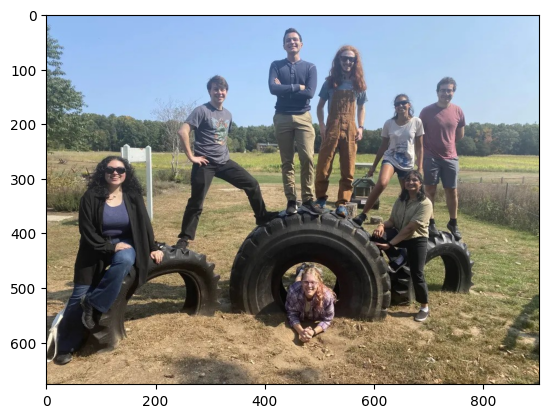

In [2]:
path_to_image = './img/class-crew.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [3]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (677, 903, 3)
Image size: 1833993


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (50, 50, 3)


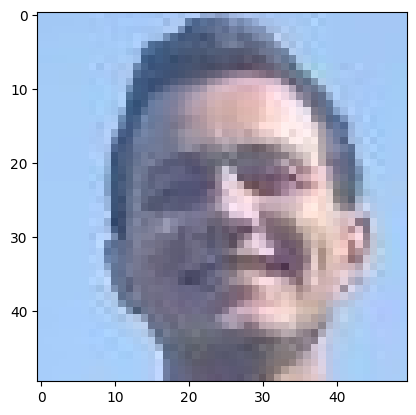

In [4]:
# TODO: Try to isolate Luke head!!
img_cropped = img_rgb[25:75, 425:475]
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (50, 50, 3)
Resized image shape: (100, 100, 3)


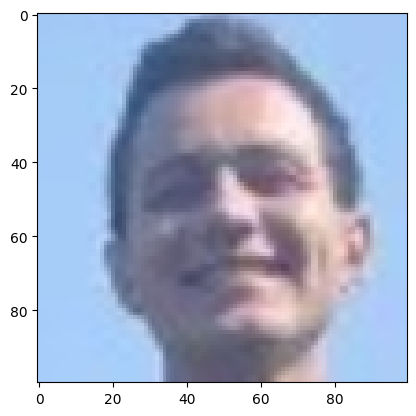

In [5]:
# TODO: Explore the cv.resize function

img_resize = cv.resize(img_cropped, (0,0), fx=2.0, fy=2.0)
print(f'Original image shape: {img_cropped.shape}')
print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)

3. Splitting the image channels

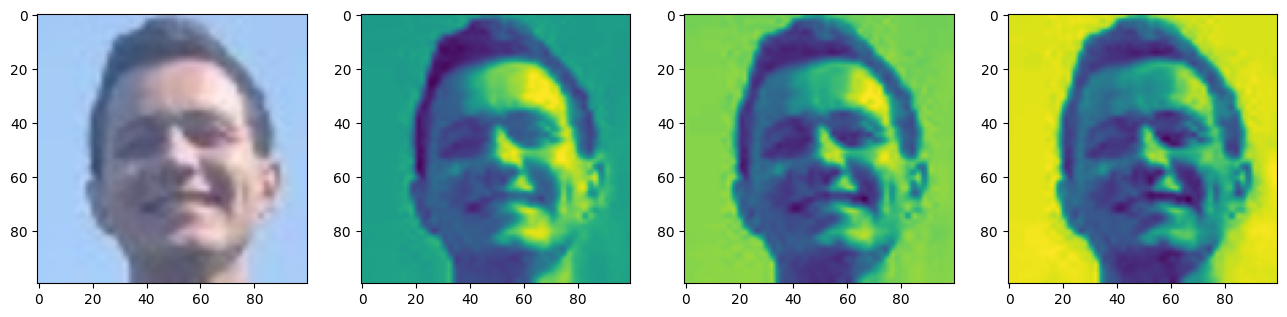

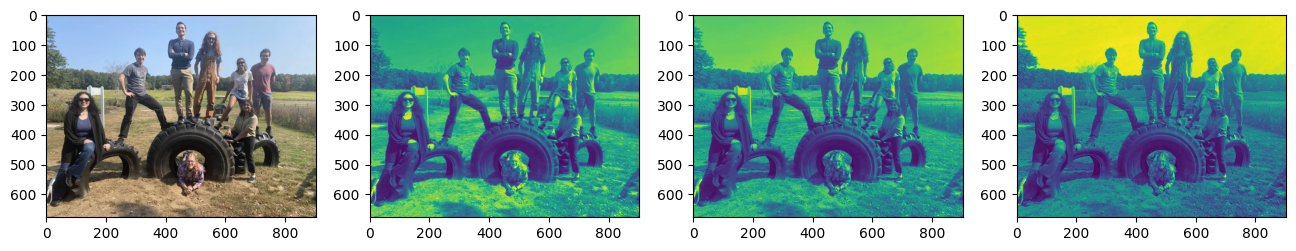

In [6]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all
b,g,r = cv.split(img_resize)
channels = b,g,r
# titles = ??

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_resize)#, plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    # plt.title(titles[i+1])

plt.show()

b_full,g_full,r_full = cv.split(img_rgb)
channels_full = b_full,g_full,r_full
# titles = ??

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb)#, plt.title(titles[0])

for i in range(len(channels_full)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels_full[i])
    # plt.title(titles[i+1])

plt.show()

4. Merging image channels

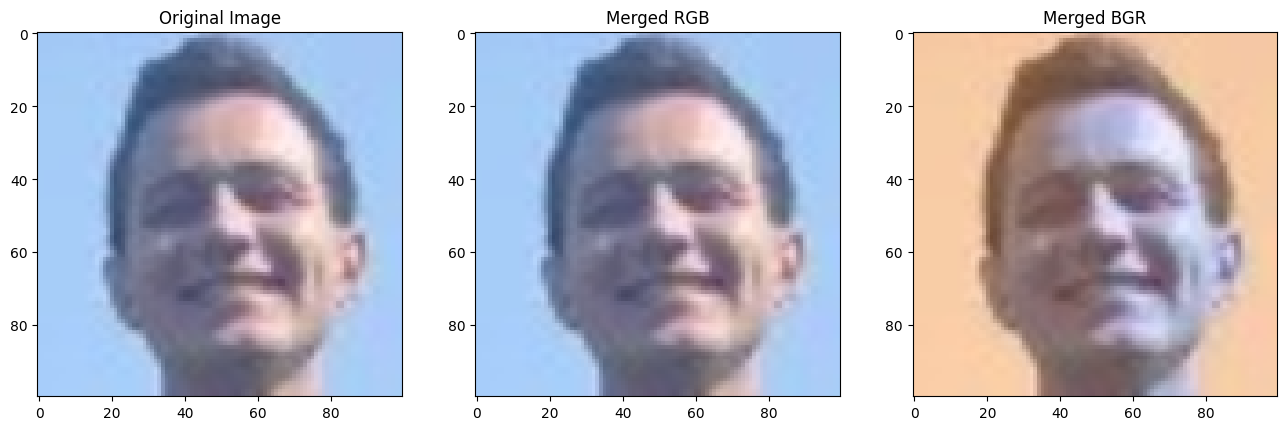

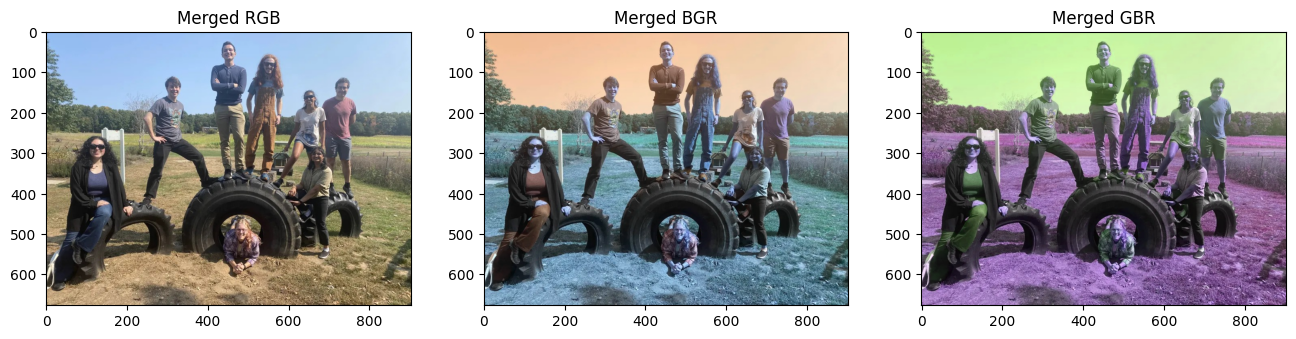

In [7]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together

merged_img_rgb = cv.merge((b,g,r))
merged_img_bgr = cv.merge((r,g,b))

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_resize), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

merged_img_rgb_full = cv.merge((b_full,g_full,r_full))
merged_img_bgr_full = cv.merge((r_full,g_full,b_full))
merged_img_grb_full = cv.merge((g_full,r_full,b_full))

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR', 'Merged GBR']
plt.figure(figsize=(16, 9))
plt.subplot(1,3,1)
plt.imshow(merged_img_rgb_full), plt.title(titles[1])
plt.subplot(1,3,2)
plt.imshow(merged_img_bgr_full), plt.title(titles[2])
plt.subplot(1,3,3)
plt.imshow(merged_img_grb_full), plt.title(titles[3])

plt.show()

5. Converting to different color spaces

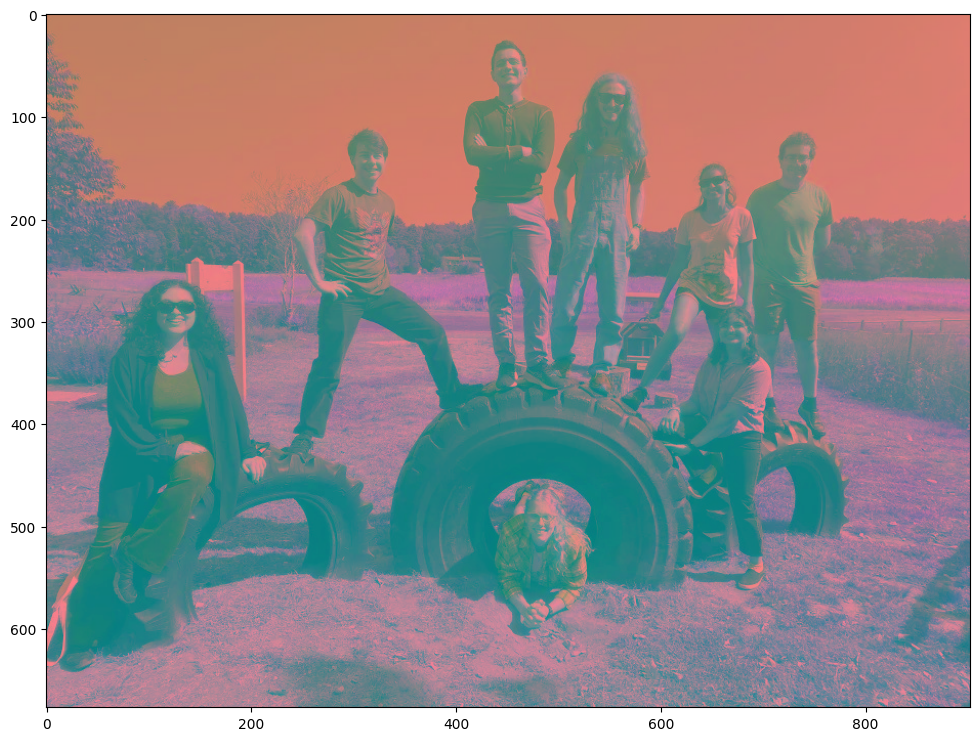

In [8]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html

#1 grayscale

#2- RG

#cv::COLOR_BayerGB2RGBA = COLOR_BayerGR2BGRA

#cv::cvtColor (InputArray src, OutputArray dst, int code, int dstCn=0)
#cv.COLOR_RGB2RGBA

new_array = img_rgb
#cv.cvtColor(src = img_rgb,dst = new_array,code = cv.COLOR_BayerGR2BGRA)
cv.cvtColor(src = img_rgb,dst = new_array,code = cv.COLOR_RGB2LAB)
plt.figure(figsize=(16, 9))
#plt.imshow(new_array,"RGB")
plt.imshow(new_array)

6. Pixel value distribution

Min and Max pixel values are: [89, 167]


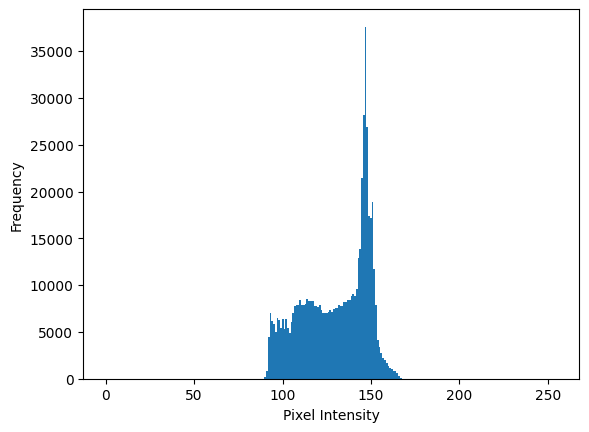

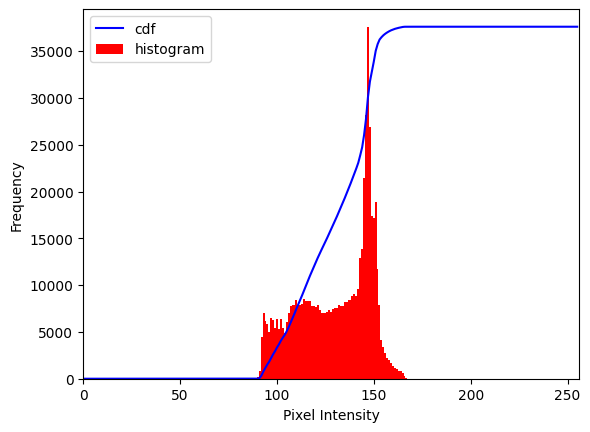

In [9]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
# img_gray = ??
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)


# TODO: 2. find the min and max pixel value
print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')



# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

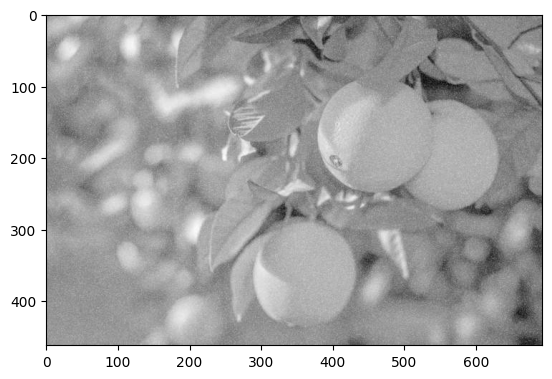

In [10]:
# import orange image file: 'orange.jpg'
#img_gray = cv.imread('.\\img\\noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)

img_gray = cv.imread('./img/noisy-oranges.jpg', cv.IMREAD_GRAYSCALE)


plt.imshow(img_gray, cmap='gray')
#plt.imshow(img_gray)

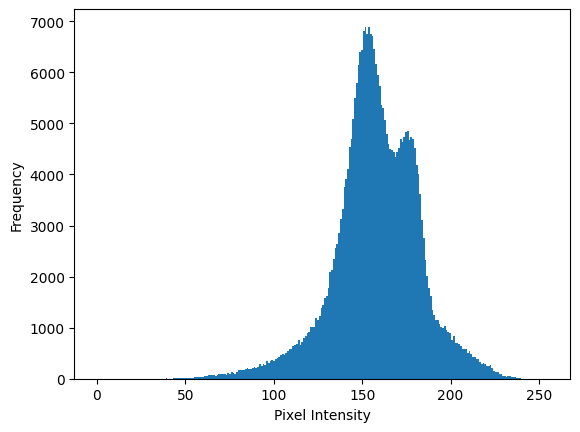

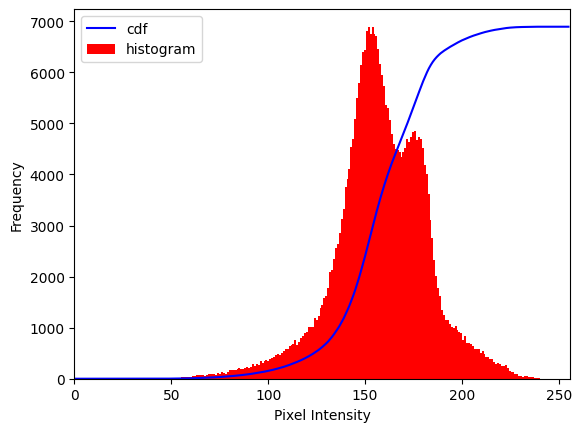

In [11]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)

# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


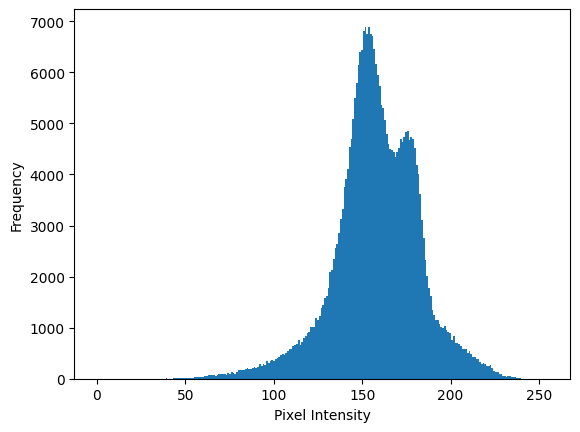

In [12]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result

hist_eq, bins_eq = np.histogram(img_gray.flatten(), histSize, histRange)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
shape = np.shape(img_gray)
img_gray_eq = np.zeros(shape)
cv.equalizeHist(img_gray,img_gray_eq)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# void cv::equalizeHist 	( 	InputArray  	src,
# 		OutputArray  	dst 
# 	) 	

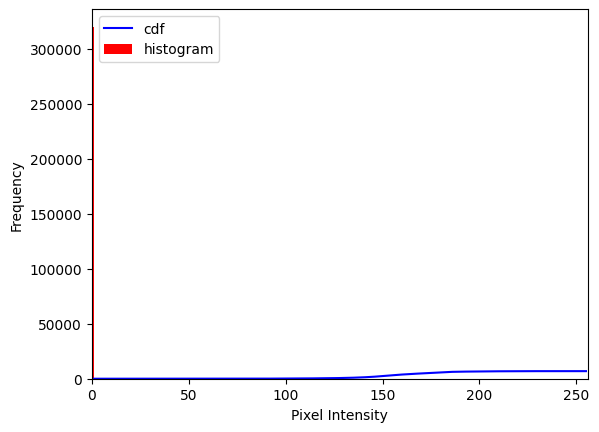

In [13]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)
cdf = hist_eq.cumsum()
cdf_normalized = cdf * float(hist_eq.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray_eq.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
#plt.xlim()
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
# Can you spot the difference??

#### 2. Image Filtering (smoothing)


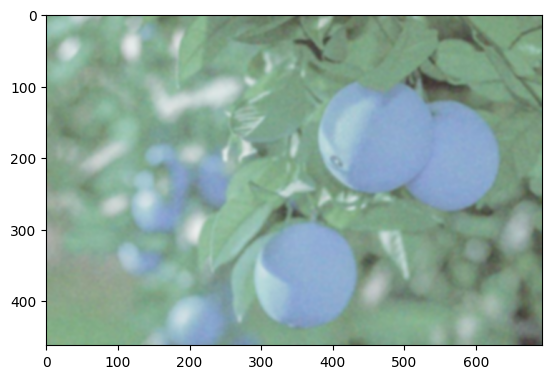

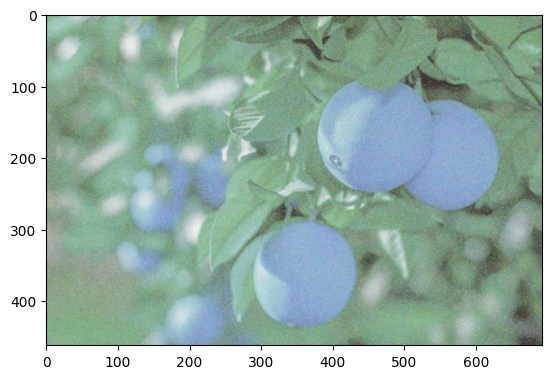

In [14]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
img = cv.imread('./img/noisy-oranges.jpg')

# TODO: Play around with different filters to get a good outcome

sq_sz = 4
kernel = np.ones((sq_sz,sq_sz),np.float32)/(sq_sz*sq_sz)
filtered_img = cv.filter2D(img,-1,kernel)
filtered_img = cv.filter2D(filtered_img,-1,kernel)

#filtered_img = img

plt.imshow(filtered_img)
plt.figure()
plt.imshow(img)

### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

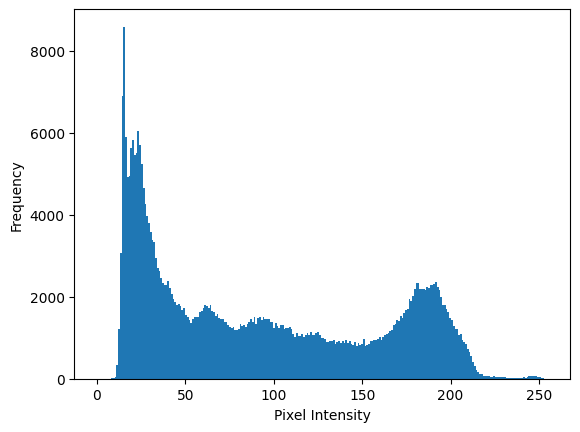

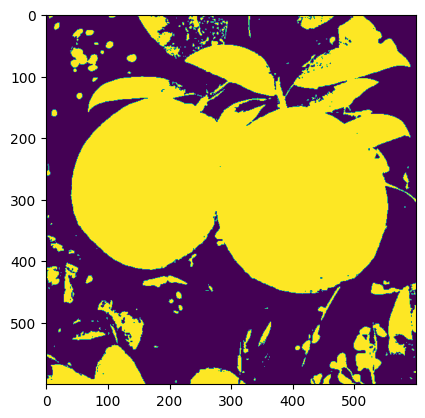

In [15]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import orange.jpg 
orange = cv.imread('./img/orange.jpg', cv.IMREAD_GRAYSCALE)
# TODO: Inspect the pixel value distribution to determine a good threshold
histSize = 256
histRange = (0, 255)
plt.hist(orange.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()
thresh = 75
# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 
orange_thresh = cv.threshold(orange, thresh,255,cv.THRESH_BINARY)
plt.figure()
plt.imshow(orange_thresh[1])


2. Monochrome image classification (adaptive approach and Otsu)

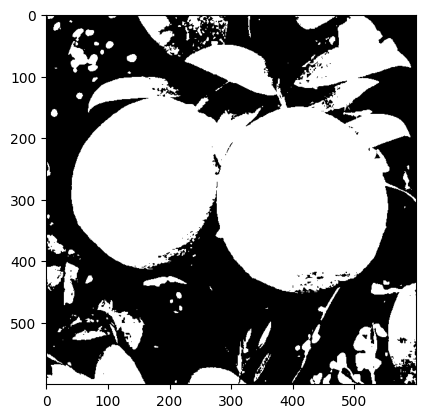

In [16]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome

orange = cv.imread('./img/orange.jpg', cv.IMREAD_GRAYSCALE)
# TODO: Inspect the pixel value distribution to determine a good threshold

orange_monochrome = cv.adaptiveThreshold(orange,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,1001,1)
plt.figure()
plt.imshow(orange_monochrome, cmap='gray')


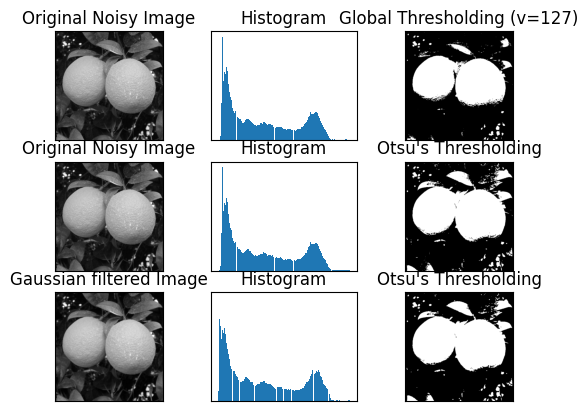

In [17]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome
orange = cv.imread('./img/orange.jpg', cv.IMREAD_GRAYSCALE)


ret1,th1 = cv.threshold(orange,127,255,cv.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv.threshold(orange,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(orange,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

#plotting

images = [orange, 0, th1,
          orange, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
 
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

# TODO: What are your observations?



3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

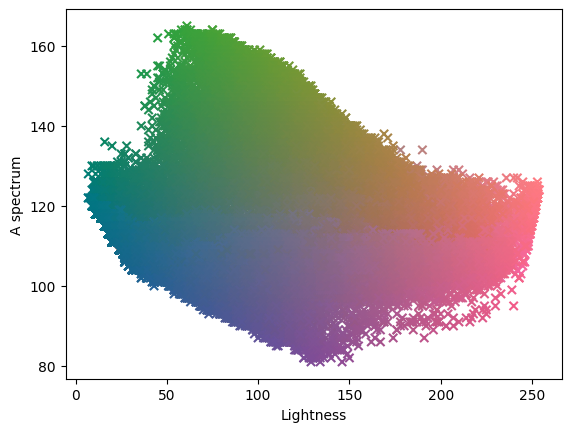

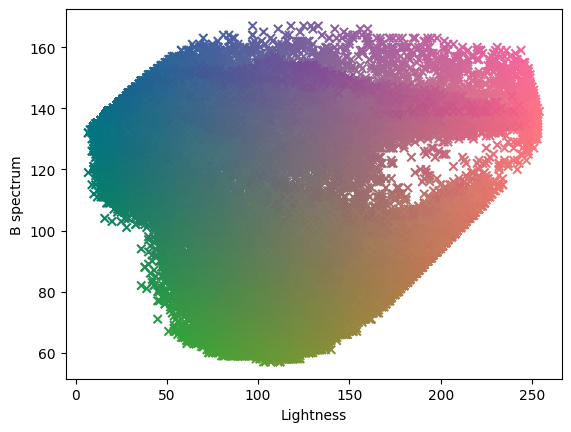

<Figure size 640x480 with 0 Axes>

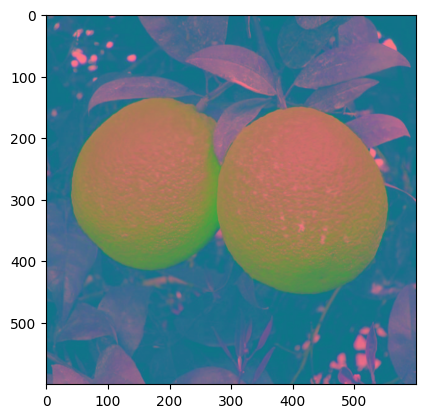

In [18]:
# TODO: Follow the resource above to define a color mask
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

# orange 2 import and convert
orange_2 = cv.imread('./img/orange-2.jpg')
orange_2 = cv.cvtColor(orange_2, cv.COLOR_BGR2RGB)
orange_2lab = cv.cvtColor(orange_2, cv.COLOR_BGR2LAB)
# orange 1 import and convert
orange = cv.imread('./img/orange.jpg')
orange = cv.cvtColor(orange, cv.COLOR_BGR2RGB)
orange_lab = cv.cvtColor(orange, cv.COLOR_BGR2LAB)

#pixel colors
norm = colors.Normalize(vmin=-1.,vmax=1.)

# for HSV
# pixel_colors = orange_2.reshape((np.shape(orange_2)[0]*np.shape(orange_2)[1], 3))
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()

# for LAB
pixel_colors = orange_lab.reshape((np.shape(orange_lab)[0]*np.shape(orange_lab)[1], 3))
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

pixel_colors_lab = orange_2lab.reshape((np.shape(orange_2lab)[0]*np.shape(orange_2lab)[1], 3))
norm.autoscale(pixel_colors_lab)
pixel_colors_lab = norm(pixel_colors_lab).tolist()

#scatterplot
# h, s, v = cv.split(orange_2)
el, ay, be = cv.split(orange_lab)
l, a, b = cv.split(orange_2lab)
# fig = plt.figure()
# axis = fig.add_subplot(1, 2, 1, projection="3d")

# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")

# fig2 = plt.figure()
# lab_axis = fig2.add_subplot(1, 2, 1, projection="3d")
# lab_axis.scatter(l.flatten(), a.flatten(), b.flatten(), facecolors=pixel_colors_lab, marker=".")
# lab_axis.set_xlabel("Lightness")
# lab_axis.set_ylabel("Red \ Green")
# lab_axis.set_zlabel("Blue \ Yellow")

plt.scatter(el.flatten(), ay.flatten(), facecolors=pixel_colors, marker="x")
plt.xlabel("Lightness")
plt.ylabel("A spectrum")
plt.figure()

plt.scatter(el.flatten(), be.flatten(), facecolors=pixel_colors, marker="x")
plt.xlabel("Lightness")
plt.ylabel("B spectrum")
plt.figure()


plt.show()
# plt.scatter(h.flatten(), s.flatten(), facecolors=pixel_colors, marker="x")
# plt.xlabel("Hue")
# plt.ylabel("Saturation")
# plt.figure()

# plt.scatter(h.flatten(), v.flatten(), facecolors=pixel_colors, marker="x")
# plt.xlabel("Hue")
# plt.ylabel("Value")
# plt.figure()

plt.imshow(orange_lab)

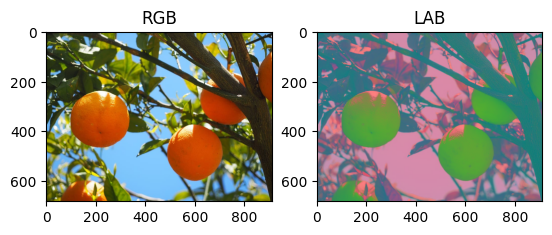

In [19]:
plt.figure()
plt.subplot(1, 2, 1)
plt.title('RGB')
plt.imshow(orange_2)
plt.subplot(1, 2, 2)
plt.title('LAB')
plt.imshow(orange_2lab)
plt.show()

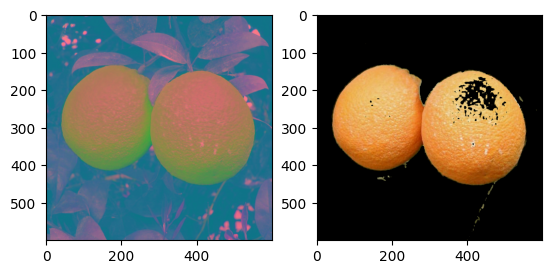

In [26]:
#select colors for mask
# (h, s, v)
# light_orange = (250, 190, 110)
# dark_orange = (135, 50, 0)
# (l, a, b)
lab_lo = (20, 112, 50)
lab_hi = (255, 180, 125)

lab2_lo = (35, 135, 25)
lab2_hi = (165, 175, 85)

# mask = cv.inRange(orange_2, dark_orange, light_orange)
mask_lab = cv.inRange(orange_lab, lab_lo, lab_hi)
result = cv.bitwise_and(orange, orange, mask=mask_lab)

mask_lab2 = cv.inRange(orange_2lab, lab2_lo, lab2_hi)
result2 = cv.bitwise_and(orange_2, orange_2, mask=mask_lab2)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(orange_lab)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

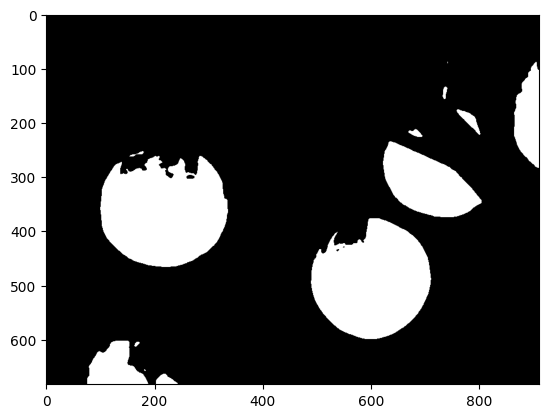

In [27]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.
mask_blur = cv.GaussianBlur(mask_lab2,(11,11),0)
mask_ret,mask_th = cv.threshold(mask_blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.figure()
plt.imshow(mask_th, cmap='gray')

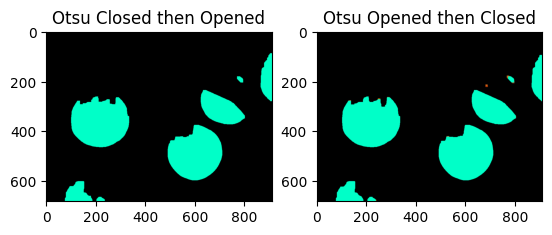

In [36]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
kernel = np.ones((9,9),np.uint8)
otsu_opened = cv.morphologyEx(mask_th, cv.MORPH_OPEN, kernel)
otsu_closed = cv.morphologyEx(mask_th, cv.MORPH_CLOSE, kernel)
result1 = cv.bitwise_and(orange_2, orange_2, mask=otsu_opened)
result2 = cv.bitwise_and(orange_2, orange_2, mask=otsu_closed)
# second round of morph operations
kernel = np.ones((11,11),np.uint8)
mask_cl_op = cv.morphologyEx(otsu_closed, cv.MORPH_OPEN, kernel) # closed then opened
result3 = cv.bitwise_and(orange_2, orange_2, mask=mask_cl_op)

mask_op_cl = cv.morphologyEx(otsu_opened, cv.MORPH_CLOSE, kernel) # opened then closed
result4 = cv.bitwise_and(orange_2, orange_2, mask=mask_op_cl)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Otsu Closed then Opened')
plt.imshow(result3)
plt.subplot(1, 2, 2)
plt.title('Otsu Opened then Closed')
plt.imshow(result4)
plt.show()

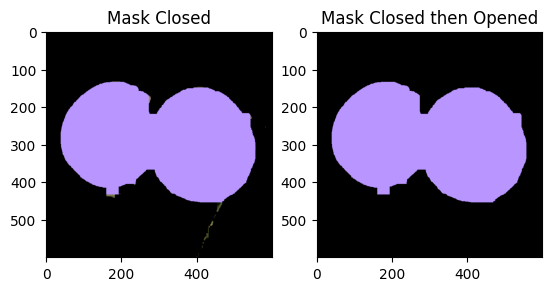

In [37]:
kernel = np.ones((19,19),np.uint8)
lab_cl = cv.morphologyEx(mask_lab, cv.MORPH_CLOSE, kernel)
kernel = np.ones((31,31),np.uint8)
lab_cl_op= cv.morphologyEx(lab_cl, cv.MORPH_OPEN, kernel)
result1 = cv.bitwise_and(orange, orange, mask=lab_cl)
result2 = cv.bitwise_and(orange, orange, mask=lab_cl_op)
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Mask Closed')
plt.imshow(result1, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Mask Closed then Opened')
plt.imshow(result2, cmap='gray')
plt.show()

4. Bounding box and segmentation visualization

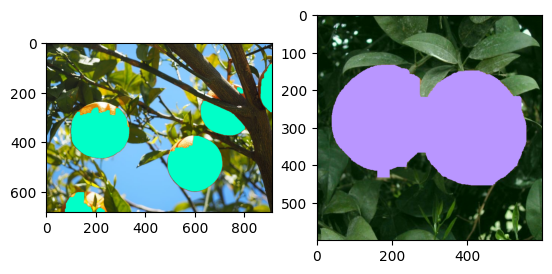

In [31]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization as in the image below.

# will retrieve only the most extreme outer contours, and approximate them by the outer corners

# for orange_2
contours, tiers = cv.findContours(mask_cl_op,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(orange_2, contours, -1, (0,255,200, 0.4), -1)
# for orange
shape, hierarchy = cv.findContours(lab_cl_op,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(orange, shape, -1, (185,150,255, 0.4), -1)

#plot the images with the contours overlaid
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(orange_2)
plt.subplot(1, 2, 2)
plt.imshow(orange)

## Example Solution

<img src=".\img\solution1.png" width="800">

<img src=".\img\solution2.png" width="400">


#### TODO
1. Generate an object detection solution for "orange.jpg" AND either "orange-2.jpg" or "orange-3.jpg" 
2. Generate a plot showing the prediction vs the ground truth for each image
3. Calculate the evaluation metric (mean average precision) for each image

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
orange ground_truths = [[41.0, 137.0, 554.0, 454.0]]
orange predictions = [[39, 135, 556, 455]]
orange_2 ground_truths = [[100.07, 238.2, 338.25, 470.65], [58.93, 598.83, 255.99, 682.0500000000001], [488.44, 375.94, 713.23, 603.61], [623.32, 167.41, 826.11, 374.99], [852.9, 81.32, 910.0, 289.85]]
orange_2 predictions = [[203, 666, 237, 683], [76, 603, 187, 683], [490, 377, 710, 600], [101, 263, 335, 467], [623, 237, 801, 375], [769, 182, 794, 207], [864, 89, 910, 282]]


Text(0.5, 1.0, 'orange-2: Ground truth vs predicted boxes')

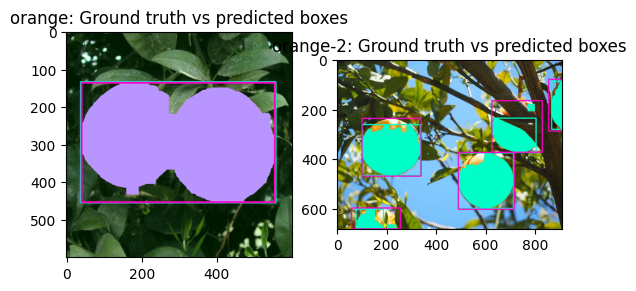

In [32]:
from helpers import get_ground_truth_ann, calculate_map

# Our goal here is to evaluate the segmentation and object detection prediction against ground truth data for the image

# TODO: Use cv.boundingRect to get the bounding box info from the contour you generated above
two_oranges = orange.copy()
many_oranges = orange_2.copy()

#initialize lists for bounding box corners
prediction_boxes = []
actual_boxes = []

contour_boxes = [] # predictions for orange_2
truth_boxes = [] # truth for orange_2


# Here we have provided a helper function to extract the ground truth bbox for the images
# image_name = 'example-image.jpg'
# ground_truth_bbox = get_ground_truth_ann(image_name=image_name, show=False)

# get ground truth bboxes from images
actual_boxes = get_ground_truth_ann(image_name='orange', show=False)

image_name = 'orange-2'
truth_boxes = get_ground_truth_ann(image_name=image_name, show=False)

for cnt in shape:
    cv.drawContours(orange, cnt, 0, (0,255,200), -1)
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(two_oranges,(x,y),(x+w,y+h),(0,255,200),3)
    prediction_boxes.append([x,y,x+w,y+h])

for cnt in contours:
    cv.drawContours(orange_2, cnt, 0, (0,255,200), -1)
    x,y,w,h = cv.boundingRect(cnt)
    cv.rectangle(many_oranges,(x,y),(x+w,y+h),(0,255,200),3)
    contour_boxes.append([x,y,x+w,y+h])

print(f'orange ground_truths = {actual_boxes}')
print(f'orange predictions = {prediction_boxes}')

print(f'orange_2 ground_truths = {truth_boxes}')
print(f'orange_2 predictions = {contour_boxes}')


# TODO: plot the results
# img_bbox = img.copy()
for box in truth_boxes:
    box = [int(v) for v in box]
    cv.rectangle(many_oranges, (box[0],box[1]), (box[2], box[3]), (255,0,200), 3)

for box in actual_boxes:
    box = [int(v) for v in box]
    cv.rectangle(two_oranges, (box[0],box[1]), (box[2], box[3]), (255,0,200), 3)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(two_oranges)
plt.title('orange: Ground truth vs predicted boxes')
plt.subplot(1, 2, 2)
plt.imshow(many_oranges)
plt.title('orange-2: Ground truth vs predicted boxes')


In [34]:
# TODO: Use the calculate_map helper function to calculate the average precision of your object detection pipeline
# mAP = calculate_map(ground_truth_bbox, prediction_bbox, iou_threshold=0.7)
# print(mAP)
mAP = calculate_map(actual_boxes, prediction_boxes, iou_threshold=0.7)
print(f'orange.jpg avg. precision: {mAP}')

mAP_2 = calculate_map(truth_boxes, contour_boxes, iou_threshold=0.7)
print(f'orange-2.jpg avg. precision: {mAP_2}')

iou_max = 0.9830043661819363
precisions = [1.0], recalls = [1.0]
orange.jpg avg. precision: 1.0
iou_max = 0.03570389399860604
precisions = [0.0], recalls = [0.0]
iou_max = 0.5340795228540124
precisions = [0.0, 0.0], recalls = [0.0, 0.0]
iou_max = 0.9587964043422698
precisions = [0.0, 0.0, 0.3333333333333333], recalls = [0.0, 0.0, 0.2]
iou_max = 0.8627857896216443
precisions = [0.0, 0.0, 0.3333333333333333, 0.5], recalls = [0.0, 0.0, 0.2, 0.4]
iou_max = 0.5836218052472946
precisions = [0.0, 0.0, 0.3333333333333333, 0.5, 0.4], recalls = [0.0, 0.0, 0.2, 0.4, 0.4]
iou_max = 0.01590344325120471
precisions = [0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.3333333333333333], recalls = [0.0, 0.0, 0.2, 0.4, 0.4, 0.4]
iou_max = 0.7489921094609495
precisions = [0.0, 0.0, 0.3333333333333333, 0.5, 0.4, 0.3333333333333333, 0.42857142857142855], recalls = [0.0, 0.0, 0.2, 0.4, 0.4, 0.4, 0.6]
orange-2.jpg avg. precision: 0.2523809523809524
